In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import operator

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.formula.api as smf

In [62]:
df = pd.read_csv('regulations_data.csv')

In [64]:
df.head()

,Country,Chapter,Subchapter,Type,Act/Practice,Coverage,Description,Time,Timeframe,References,References_2,References_3,References_4
0,UNITED STATES,Online sales and transactions,Online sales,Trading restrictions,Restriction on online sales,E-retail,"Three US States (Alabama, Oklahoma and Utah) p...",2016.0,Reported in 2016,http://www.ncsl.org/research/financial-service...,NaN,NaN,NaN
1,UNITED STATES,Online sales and transactions,Online sales,Trading restrictions,Restriction on online sales,E-retail,While it is possible to sell drugs online in t...,NaN,NaN,http://www.fda.gov/AboutFDA/Transparency/Basic...,http://patients.about.com/od/savemoneyondrugs/...,http://www.cnbc.com/2014/05/23/patients-cross-...,https://www.canadapost.ca/tools/pg/manual/PGcu...
2,UNITED STATES,Online sales and transactions,Online sales,Trading restrictions,Revised Code of Washington (RCW),E-retail,"Since July 2009, ordering most of tobacco prod...",2009.0,Since July 2009,http://www.atg.wa.gov/ban-internet-and-mail-or...,NaN,NaN,NaN
3,UNITED STATES,Online sales and transactions,Online sales,Trading restrictions,Wire Act (1961) \n\nIllegal Gambling Business ...,Online gambling,Overlapping Federal and State regulations proh...,1961.0,Since 1961,https://www.wto.org/english/tratop_e/dispu_e/c...,https://www.law.cornell.edu/uscode/text/18/1084,http://www.fbi.gov/news/stories/2007/june/gamb...,NaN
4,UNITED STATES,Online sales and transactions,Domain name (DNS) registration requirements,Trading restrictions,usTLD Nexus Requirements Policy,Horizontal,Foreign entities or organizations need a bona ...,NaN,NaN,http://www.neustar.us/the-ustld-nexus-requirem...,http://www.business-sweden.se/Export/Exportreg...,NaN,NaN


In [66]:
df.shape

(1821, 13)

In [67]:
df.columns

Index(['Country', 'Chapter', 'Subchapter', 'Type', 'Act/Practice', 'Coverage',
       'Description', 'Time', 'Timeframe', 'References', 'References_2',
       'References_3', 'References_4'],
      dtype='object')

In [68]:
df.Country.unique()

array(['UNITED STATES', 'TURKEY', 'SWITZERLAND', 'SOUTH AFRICA', 'RUSSIA',
       'PARAGUAY', 'PANAMA', 'PAKISTAN', 'NORWAY', 'NIGERIA', 'INDIA',
       'ISRAEL', 'ICELAND', 'UNITED KINGDOM', 'SWEDEN', 'SPAIN',
       'SLOVENIA', 'SLOVAKIA', 'ROMANIA', 'PORTUGAL', 'POLAND',
       'NETHERLANDS', 'MALTA', 'LUXEMBOURG', 'LATVIA', 'LITHUANIA',
       'ITALY', 'IRELAND', 'HUNGARY', 'GREECE', 'GERMANY', 'FRANCE',
       'FINLAND', 'ESTONIA', 'DENMARK', 'CZECH REPUBLIC', 'CYPRUS',
       'CROATIA', 'BULGARIA', 'BELGIUM', 'AUSTRIA', 'ECUADOR',
       'COSTA RICA', 'COLOMBIA', 'ARGENTINA', 'THAILAND', 'TAIWAN',
       'SINGAPORE', 'PHILIPPINES', 'NEW ZEALAND', 'MEXICO', 'MALAYSIA',
       'KOREA', 'JAPAN', 'INDONESIA', 'HONG KONG', 'CHILE', 'CANADA',
       'BRUNEI', 'PERU', 'AUSTRALIA', 'VIETNAM', 'CHINA', 'BRAZIL',
       'EUROPEAN UNION', '0'], dtype=object)

In [69]:
len(df.Country.unique())

66

___

In [70]:
df_type_dataFlow = df[df.Subchapter == 'Restrictions on cross-border data flows']

In [71]:
df_type_dataFlow.shape

(108, 13)

In [126]:
len(df_type_dataFlow.Country.unique())

46

In [192]:
time = df_type_dataFlow.Time.value_counts().rename_axis('Year').reset_index(name='Count')
time.drop(time.index[28], inplace =True)

In [193]:
time.Year = time.Year.astype(int)

In [194]:
full_timeList = list(range(1972, 2020))

for i in full_timeList:
    if i in list(time['Year']):
        continue
    else:
        time = time.append({'Year': i, 'Count':0}, ignore_index= True)
        
        
time.sort_values(by='Year', inplace=True)
time.reset_index(inplace = True)
time.drop('index', axis=1, inplace = True)
time.reset_index(inplace = True)
time['index'] += 1

In [195]:
time.head()

,index,Year,Count
0,1,1972,1
1,2,1973,0
2,3,1974,0
3,4,1975,0
4,5,1976,0


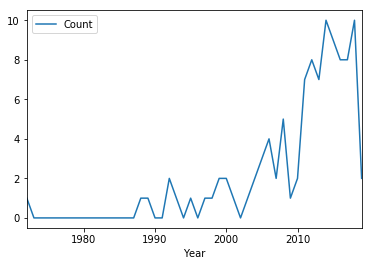

In [175]:
time_plot = time.plot.line(x = 'Year', y = 'Count')

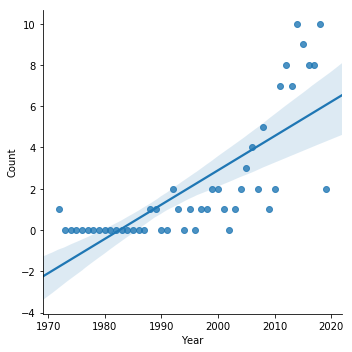

In [141]:
time_plot_v2 = sns.lmplot(x='Year',y='Count',data=time,fit_reg=True)

In [196]:
## Regression

X = time["index"]
y = time["Count"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     89.84
Date:                Sun, 21 Jul 2019   Prob (F-statistic):           1.75e-12
Time:                        23:27:34   Log-Likelihood:                -105.33
No. Observations:                  48   AIC:                             212.7
Df Residuals:                      47   BIC:                             214.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
index          0.1067      0.011      9.478      0.000       0.084       0.129
==============================================================================
Omnibus:                       13.374   Durbin-Watson:                   0.686
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.209
Skew:                           1.273   Prob(JB):                     0.000821
Kurtosis:                       3.792   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1.5615664267843348
0.7327555400790073


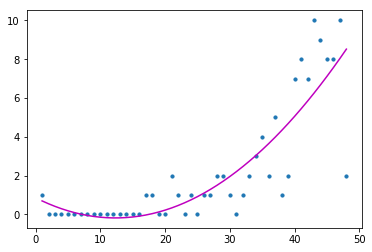

In [197]:
# transforming the data to include another axis
x = X[:, np.newaxis]
Y = y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, Y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(Y,y_poly_pred))
r2 = r2_score(Y,y_poly_pred)
print(rmse)
print(r2)

plt.scatter(x, Y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

In [198]:
degree = 3

df_poly = pd.DataFrame(columns=['y', 'x'])
df_poly['x'] = X
df_poly['y'] = y

weights = np.polyfit(X, y, degree)
model = np.poly1d(weights)
results = smf.ols(formula='y ~ model(X)', data=df_poly).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     126.4
Date:                Sun, 21 Jul 2019   Prob (F-statistic):           8.67e-15
Time:                        23:27:43   Log-Likelihood:                -89.471
No. Observations:                  48   AIC:                             182.9
Df Residuals:                      46   BIC:                             186.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.388e-15      0.299   4.64e-15      1.000      -0.602       0.602
model(X)       1.0000      0.089     11.241      0.000       0.821       1.179
==============================================================================
Omnibus:                       27.629   Durbin-Watson:                   1.360
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.009
Skew:                          -1.420   Prob(JB):                     4.23e-18
Kurtosis:                       8.652   Cond. No.                         4.53
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""